In [1]:
import pandas as pd

In [2]:
gist_data = pd.read_csv('gist_data.csv')

In [4]:
gist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40 non-null     int64  
 1   storeNo     40 non-null     int64  
 2   name        40 non-null     object 
 3   address     40 non-null     object 
 4   x           40 non-null     float64
 5   y           40 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ KB


In [14]:
g_data = gist_data[['x','y']]
g_data

,x,y
0,126.842948,35.226879
1,126.838434,35.218352
2,126.843465,35.213834
3,126.836768,35.211931
4,126.840820,35.221019
5,126.836768,35.211931
6,126.844354,35.215021
7,126.846218,35.218231
8,126.844757,35.214625
9,126.844126,35.221684


## GIST 식당 정보 시각화

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

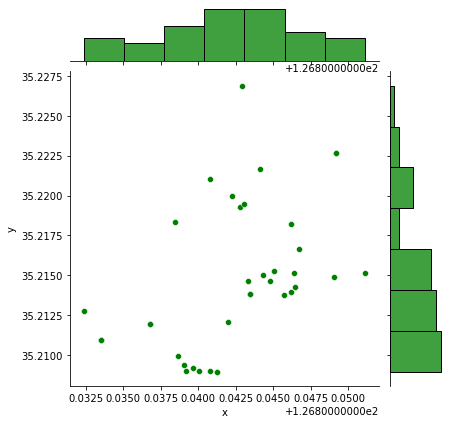

In [25]:
# 2차원으로 표현하기
sns.jointplot(x=g_data['x'],y=g_data['y'],color='green',kind='scatter')

## 군집 정보

In [26]:
from sklearn.cluster import KMeans

/var/folders/tp/dcr77srx31sfjt_0ldrqb0hh0000gn/T/ipykernel_2715/1390293724.py:6: ConvergenceWarning: Number of distinct clusters (32) found smaller than n_clusters (33). Possibly due to duplicate points in X.
  model.fit(g_data)
/var/folders/tp/dcr77srx31sfjt_0ldrqb0hh0000gn/T/ipykernel_2715/1390293724.py:6: ConvergenceWarning: Number of distinct clusters (32) found smaller than n_clusters (34). Possibly due to duplicate points in X.
  model.fit(g_data)
/var/folders/tp/dcr77srx31sfjt_0ldrqb0hh0000gn/T/ipykernel_2715/1390293724.py:6: ConvergenceWarning: Number of distinct clusters (32) found smaller than n_clusters (35). Possibly due to duplicate points in X.
  model.fit(g_data)
/var/folders/tp/dcr77srx31sfjt_0ldrqb0hh0000gn/T/ipykernel_2715/1390293724.py:6: ConvergenceWarning: Number of distinct clusters (32) found smaller than n_clusters (36). Possibly due to duplicate points in X.
  model.fit(g_data)
/var/folders/tp/dcr77srx31sfjt_0ldrqb0hh0000gn/T/ipykernel_2715/1390293724.py:6: Con

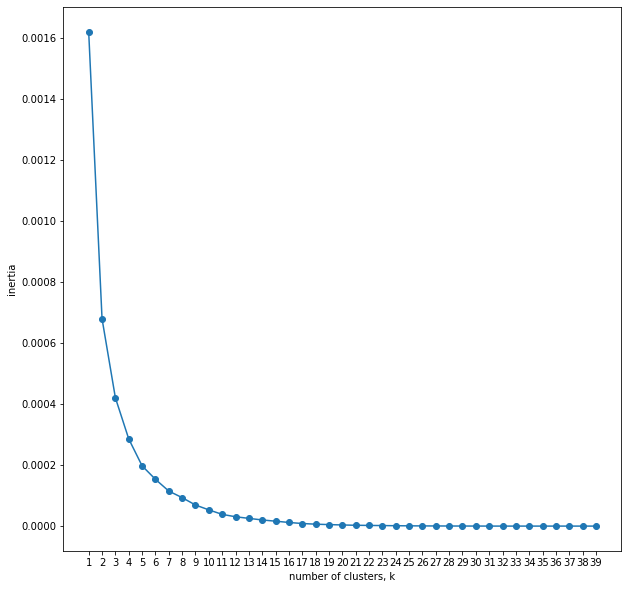

In [31]:
ks = range(1,40)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(g_data)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(10, 10))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [48]:
# K-means 모델과 군집 예측값을 생성

# 클러스터 모델 생성, 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters=25)

clust_model.fit(g_data)

centers = clust_model.cluster_centers_
pred =  clust_model.predict(g_data)

print(pd.DataFrame(centers))
print(pred[:15])

             0          1
0   126.839117  35.209199
1   126.846370  35.215148
2   126.849214  35.222690
3   126.842275  35.219979
4   126.833505  35.210945
5   126.843332  35.214621
6   126.851128  35.215179
7   126.842948  35.226879
8   126.838434  35.218352
9   126.836768  35.211931
10  126.846218  35.218231
11  126.841099  35.208984
12  126.832366  35.212760
13  126.844126  35.221684
14  126.841960  35.212072
15  126.844556  35.214823
16  126.840820  35.221019
17  126.849069  35.214910
18  126.846751  35.216644
19  126.846108  35.214012
20  126.843465  35.213834
21  126.838642  35.209966
22  126.842912  35.219384
23  126.839866  35.209080
24  126.845060  35.215284
[ 7  8 20  9 16  9 15 10 15 13 23 20 11 11  5]


In [49]:
clust_df = gist_data.copy()
clust_df['clust'] = pred
clust_df

,Unnamed: 0,storeNo,name,address,x,y,clust
0,39,0,GIST대학,광주 북구 첨단과기로 123,126.842948,35.226879,7
1,0,1,한솥도시락,광주 광산구 임방울대로 727-6,126.838434,35.218352,8
2,16,2,맘스터치,광주 광산구 첨단중앙로 96,126.843465,35.213834,20
3,36,3,킹스샌드&샐러드,광주 광산구 첨단내촌로57번길 6,126.836768,35.211931,9
4,1,5,김밥랜드,광주 광산구 첨단중앙로181번길 5,126.840820,35.221019,16
5,37,40,달콤,광주 광산구 첨단내촌로57번길 6,126.836768,35.211931,9
6,18,44,또아식빵,광주 광산구 첨단중앙로106번길 23,126.844354,35.215021,15
7,5,52,에그드랍,광주 광산구 임방울대로801번길 8,126.846218,35.218231,10
8,19,53,기가찬국밥,광주 광산구 첨단중앙로106번길 30,126.844757,35.214625,15
9,6,65,원할머니보쌈,광주 광산구 첨단중앙로182번길 24,126.844126,35.221684,13


### 스케일링과 군집분석

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(g_data.iloc[:,0:4]), columns=g_data.iloc[:,0:4].columns)



In [52]:
clust_model.fit(scaled_df)

centers_s = clust_model.cluster_centers_
pred_s = clust_model.predict(scaled_df)

In [53]:
clust_df['clust_s'] = pred_s
clust_df

,Unnamed: 0,storeNo,name,address,x,y,clust,clust_s
0,39,0,GIST대학,광주 북구 첨단과기로 123,126.842948,35.226879,7,8
1,0,1,한솥도시락,광주 광산구 임방울대로 727-6,126.838434,35.218352,8,10
2,16,2,맘스터치,광주 광산구 첨단중앙로 96,126.843465,35.213834,20,2
3,36,3,킹스샌드&샐러드,광주 광산구 첨단내촌로57번길 6,126.836768,35.211931,9,0
4,1,5,김밥랜드,광주 광산구 첨단중앙로181번길 5,126.840820,35.221019,16,4
5,37,40,달콤,광주 광산구 첨단내촌로57번길 6,126.836768,35.211931,9,0
6,18,44,또아식빵,광주 광산구 첨단중앙로106번길 23,126.844354,35.215021,15,16
7,5,52,에그드랍,광주 광산구 임방울대로801번길 8,126.846218,35.218231,10,1
8,19,53,기가찬국밥,광주 광산구 첨단중앙로106번길 30,126.844757,35.214625,15,16
9,6,65,원할머니보쌈,광주 광산구 첨단중앙로182번길 24,126.844126,35.221684,13,14


### 클러스터 별 중심지역 만들기

In [59]:
cluster_mean = clust_df.groupby('clust').mean()
cluster_mean.to_csv('clustered.csv',mode='w',index=False)

In [67]:
clust_df.sort_values('clust')
clust_count = [0]*25

for i in range(len(clust_df)):
    clust_num = clust_df.iloc[i]['clust']
    clust_count[clust_num-1] = clust_count[clust_num-1] + 1

ccdf = pd.DataFrame(clust_count)
ccdf.to_csv('clusterCount.csv',mode='w',index=False)